In [7]:
#!pip install citipy

### Student: Angela Shane
#### Homework 06: WeatherPy

#### Analysis
"What's the weather like as we approach the equator?"

* Observation 1: The temperature peaks as you get closer to the equator (latitude = 0).
* Observation 2: The temperature does not drop below 0 until you get to a latitude of -60 to -90.
* Observation 3: There doesn't seem to be much of a correlation between th equator and the humidity, cloudiness or wind speed.

In [8]:
import json
import requests
import pandas as pd
from citipy import citipy
from random import uniform
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [9]:
cities_df = pd.DataFrame(columns=("city","country","lat","lng","temp","humidity","cloudiness","wind_speed"))

In [10]:
def getCoordinates(quadrant):
    if quadrant == 1:
        x = uniform(0,90)
        y = uniform(0,-180)
        return x,y
    if quadrant == 2:
        x = uniform(0,90)
        y = uniform(0,180)
        return x,y
    if quadrant == 3:
        x = uniform(0,-90)
        y = uniform(0,180)
        return x,y
    x = uniform(0,-90)
    y = uniform(0,-180)
    return x,y

#### Generate Random Cities
* to generate a full range of cities, generate longitude and latitude based on quadrant
* check for duplicate cities

In [11]:
sample_size_lim = 500
sample_size = len(cities_df)
while sample_size < sample_size_lim:
    quadrant = (sample_size % 4) + 1
    point = (getCoordinates(quadrant))
    city = citipy.nearest_city(point[0], point[1])
    if not ((cities_df['city'] == city.city_name) & (cities_df['country'] == city.country_code)).any():
        #print(f"city: {city.city_name} country: {city.country_code}, coordinates: {point}")
        cities_df.loc[sample_size] = [city.city_name, city.country_code, point[0], point[1],'','','','']
    sample_size = len(cities_df)
cities_df.head(10)

,city,country,lat,lng,temp,humidity,cloudiness,wind_speed
0,ilulissat,gl,70.986942,-45.947934,,,,
1,butaritari,ki,9.207698,167.481948,,,,
2,port alfred,za,-89.564623,44.566343,,,,
3,mataura,pf,-80.005958,-165.491034,,,,
4,mayo,ca,64.987109,-139.609669,,,,
5,rudnogorsk,ru,56.815359,103.497909,,,,
6,ambon,id,-5.773809,128.619585,,,,
7,ushuaia,ar,-82.735518,-82.661400,,,,
8,yorosso,ml,12.451908,-5.119099,,,,
9,saskylakh,ru,77.552664,119.424151,,,,


#### Check the city sample size is evenly distributed

In [12]:
chart_date = datetime.now().strftime('%m/%d/%Y')
chart_date

'08/16/2017'

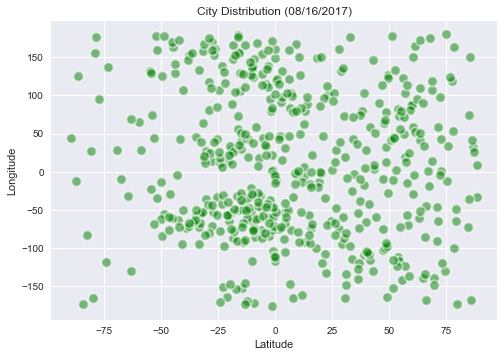

In [21]:
xaxis = []
yaxis = []
for idx, row in cities_df.iterrows():
    xaxis.append(float(row["lat"]))
    yaxis.append(float(row["lng"]))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xaxis, yaxis, marker="o",color="green",s=100, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Distribution (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
sns.set()
plt.savefig('lat_long.png')
plt.show()

#### Call Weather API to retrieve weather information for each city

In [14]:
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"
for idx, row in cities_df.iterrows():
    print("Now retrieving weather for #%s, city: %s" % ( idx, row['city']))
    query_url = url + "appid=" + api_key + "&lat=" + str(row["lat"]) + "&lon=" + str(row["lng"]) + "&units=imperial&mode=json"
    print(query_url)
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        cities_df.set_value(idx,'temp',weather_json["main"]["temp"])
        cities_df.set_value(idx,'humidity',weather_json["main"]["humidity"])
        cities_df.set_value(idx,'cloudiness',weather_json["clouds"]["all"])
        cities_df.set_value(idx,'wind_speed',weather_json["wind"]["speed"])
    except:
        print("skipping city %s" % (row['city']))
cities_df.head(10)

Now retrieving weather for #0, city: ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=70.9869422905615&lon=-45.947934480208545&units=imperial&mode=json
Now retrieving weather for #1, city: butaritari
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=9.207698428077498&lon=167.48194837491053&units=imperial&mode=json
Now retrieving weather for #2, city: port alfred
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-89.56462306535181&lon=44.56634331260186&units=imperial&mode=json
Now retrieving weather for #3, city: mataura
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-80.00595756216818&lon=-165.49103416170445&units=imperial&mode=json
Now retrieving weather for #4, city: mayo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=64.98710923644147&lon=-139.6096691920443&units=imperi

,city,country,lat,lng,temp,humidity,cloudiness,wind_speed
0,ilulissat,gl,70.986942,-45.947934,19.03,100,88,12.24
1,butaritari,ki,9.207698,167.481948,82.4,78,1,9.17
2,port alfred,za,-89.564623,44.566343,-57.93,0,36,25.55
3,mataura,pf,-80.005958,-165.491034,-32.19,0,8,8.99
4,mayo,ca,64.987109,-139.609669,41.26,94,80,2.17
5,rudnogorsk,ru,56.815359,103.497909,58.99,75,48,5.75
6,ambon,id,-5.773809,128.619585,80.14,100,92,13.69
7,ushuaia,ar,-82.735518,-82.661400,-25.26,32,68,12.68
8,yorosso,ml,12.451908,-5.119099,88.78,64,0,12.68
9,saskylakh,ru,77.552664,119.424151,34.15,86,76,18.5


#### Output city weather information to csv

In [15]:
cities_df.to_csv('weather_cities.csv')

#### Generate series data for chart

In [16]:
axis_lat = []
axis_temp = []
axis_humd = []
axis_cloud = []
axis_wind = []

for idx, row in cities_df.iterrows():
    axis_lat.append(float(row["lat"]))
    axis_temp.append(float(row["temp"]))
    axis_humd.append(float(row["humidity"]))
    axis_cloud.append(float(row["cloudiness"]))
    axis_wind.append(float(row["wind_speed"]))


#### Chart city latitude versus temperature

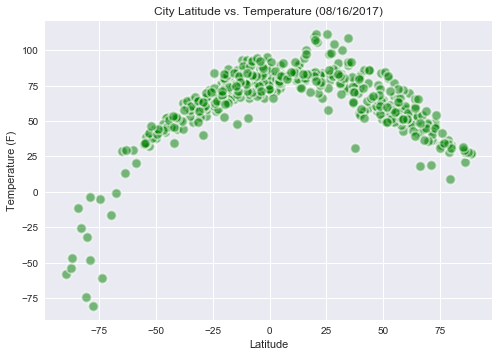

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(axis_lat, axis_temp, marker="o",color="green",s=100, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Temperature (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Temperature (F)")
sns.set()
plt.savefig('lat_temp.png')
plt.show()

#### Chart city latitude versus humidity


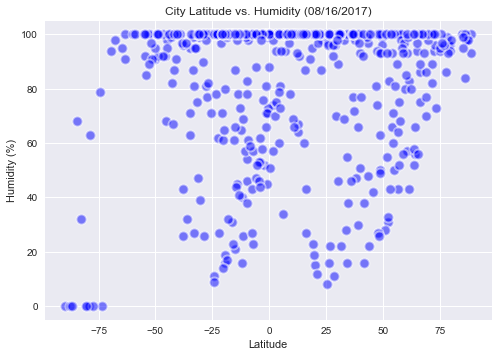

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(axis_lat,axis_humd, marker="o",color="blue",s=100, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Humidity (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
sns.set()
plt.savefig('lat_humidity.png')
plt.show()

#### Chart city latitude versus cloudiness

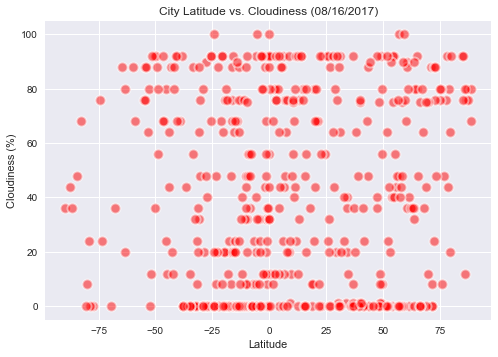

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(axis_lat, axis_cloud, marker="o",color="red",s=100, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Cloudiness (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
sns.set()
plt.savefig('lat_cloud.png')
plt.show()

#### Chart city latitude versus wind speed

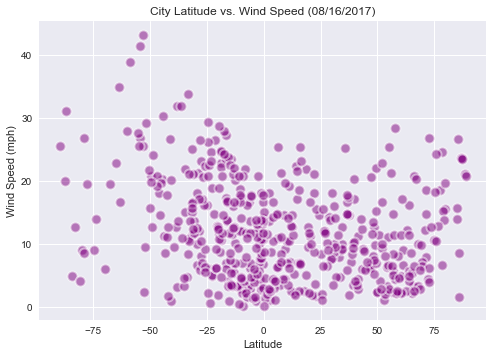

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter( axis_lat,axis_wind,marker="o",color="purple",s=100, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Wind Speed (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
sns.set()
plt.savefig('lat_wind.png')
plt.show()